In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#테스트 데이터 로딩

data = pd.read_csv('/content/MyDrive/MyDrive/머신러닝 프로젝트/모델링/ml_data_statistics_add.csv', encoding='utf-8',index_col=0)
data.head()

,브랜드,제품명,제품코드,원가,할인가,할인율,사이즈 수,human_ditect,컬러_encoded,스타일샷_유무,...,제목태그점수,최대_리뷰수,최소_리뷰수,중앙값_리뷰수,최대_총조회수,최소_총조회수,중앙값_총조회수,최대_총구매수,최소_총구매수,중앙값_총구매수
0,필루미네이트,[무료반품] 옵티멀 베이직 셔츠-화이트[린넨＆옥스포드 선택],994588.0,53000.0,39900.0,0.25,4.0,0.0,38.0,1.0,...,1.193833,10448.0,0.0,30.0,206455.0,160.0,2804.0,26174.0,27.0,123.0
1,무신사 스탠다드,베이식 드레스 셔츠 [화이트],983339.0,33900.0,33900.0,0.00,5.0,1.0,38.0,1.0,...,1.240080,23232.0,0.0,146.0,67763.0,372.0,3248.0,16459.0,24.0,363.0
2,무신사 스탠다드,릴렉스 핏 옥스포드 셔츠 [화이트],854337.0,33900.0,30490.0,0.10,6.0,1.0,38.0,1.0,...,1.214907,23232.0,0.0,146.0,67763.0,372.0,3248.0,16459.0,24.0,363.0
3,파르티멘토,[세트][선택] 스톤 워싱 데님 셋업 블루,2524570.0,76800.0,59900.0,0.22,3.0,0.0,30.0,1.0,...,1.128610,9761.0,0.0,25.0,90012.0,209.0,2595.0,10687.0,20.0,93.0
4,유니온블루,LAUNDRY SHIRT (LAVENDER GRAY),2375962.0,62000.0,59000.0,0.05,5.0,1.0,8.0,1.0,...,1.332572,11957.0,3.0,556.0,36683.0,1375.0,6644.0,10954.0,36.0,1001.0


In [ ]:
#쓰지않는 컬럼제거
def drop_feature(data):
    data.drop( ["브랜드", "제품명", "제품코드",'총구매수'],axis=1, inplace=True )
    return data

In [ ]:
# data = drop_feature(data)
#독립변수와 종속변수를 분리
y = data.loc[:,"판매량등급"]
x = data.drop("판매량등급", axis=1)

In [ ]:
x.columns

Index(['브랜드', '제품명', '제품코드', '원가', '할인가', '할인율', '사이즈 수', 'human_ditect',
       '컬러_encoded', '스타일샷_유무', '총구매수', '총조회수_평균', '총구매수_평균', '브랜드_구매_성별',
       '브랜드_조회_성별', 'rgb_1', 'rgb_2', '리뷰_평균', 'word1_score', 'word2_score',
       'word3_score', '브랜드 좋아요 수', '브랜드_라벨링', '카테고리_골프', '카테고리_기타', '카테고리_럭셔리',
       '카테고리_베이식', '카테고리_스트릿', '카테고리_스포츠_아웃도어', '카테고리_여성_캐주얼', '카테고리_영_캐주얼',
       '카테고리_컨템포러리', '카테고리_트래디셔널', '카테고리_포멀', '제목태그점수', '최대_리뷰수', '최소_리뷰수',
       '중앙값_리뷰수', '최대_총조회수', '최소_총조회수', '중앙값_총조회수', '최대_총구매수', '최소_총구매수',
       '중앙값_총구매수'],
      dtype='object')

In [ ]:
x2 =x.drop(['브랜드', '제품명', '제품코드', '총구매수'], axis = 1)

In [ ]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 0 to 3789
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   원가             3790 non-null   float64
 1   할인가            3790 non-null   float64
 2   할인율            3790 non-null   float64
 3   사이즈 수          3790 non-null   float64
 4   human_ditect   3790 non-null   float64
 5   컬러_encoded     3790 non-null   float64
 6   스타일샷_유무        3790 non-null   float64
 7   총조회수_평균        3790 non-null   float64
 8   총구매수_평균        3790 non-null   float64
 9   브랜드_구매_성별      3790 non-null   int64  
 10  브랜드_조회_성별      3790 non-null   int64  
 11  rgb_1          3790 non-null   int64  
 12  rgb_2          3790 non-null   int64  
 13  리뷰_평균          3790 non-null   float64
 14  word1_score    3790 non-null   float64
 15  word2_score    3790 non-null   float64
 16  word3_score    3790 non-null   float64
 17  브랜드 좋아요 수      3790 non-null   int64  
 18  브랜드_라벨링      

In [ ]:
corr = data.corr()

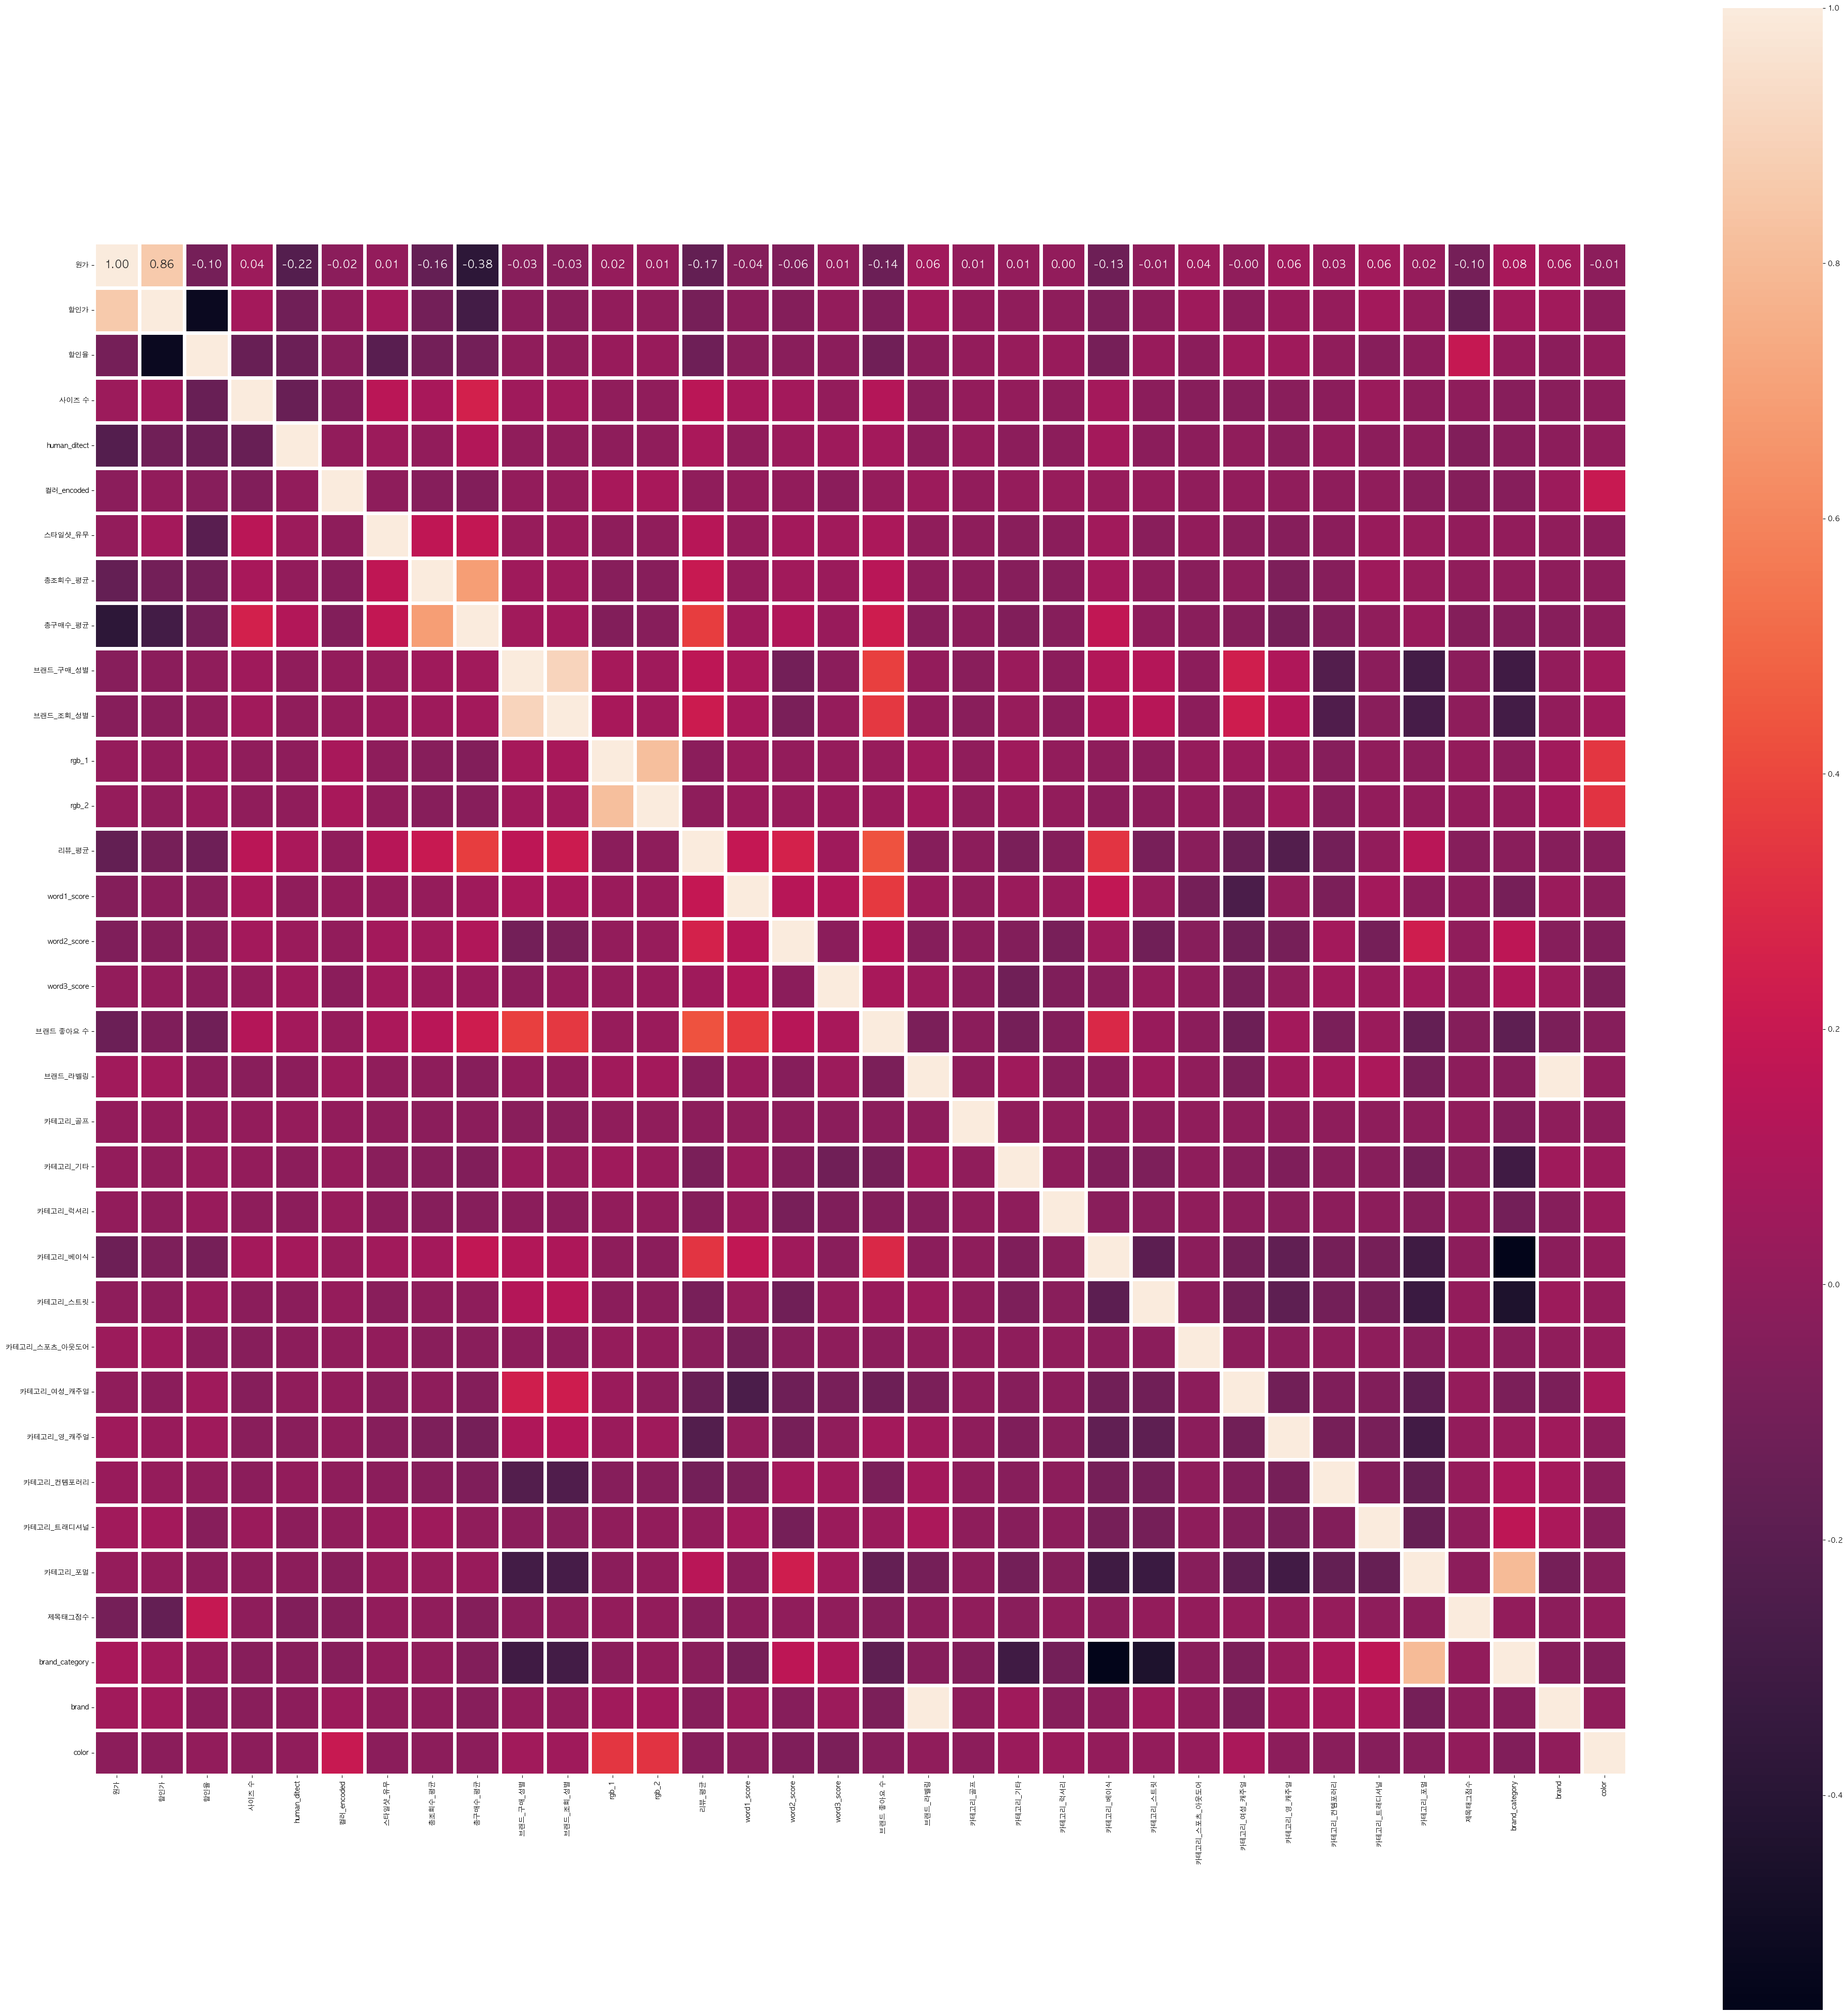

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(40, 40))
plt.rc('font', size = 10)
hm = sns.heatmap(corr.values,
            cbar = True,
            annot = True,
            square = True,
            fmt = '.2f',
            linewidth = 5,
            annot_kws = {'size': 15},
            yticklabels = data.columns,
            xticklabels = data.columns)

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['원가', '할인가', '할인율', '사이즈 수', 'human_ditect', '컬러_encoded', '스타일샷_유무',
       '총조회수_평균', '총구매수_평균', '브랜드_구매_성별', '브랜드_조회_성별', 'rgb_1', 'rgb_2',
       '리뷰_평균', 'word1_score', 'word2_score', 'word3_score', '브랜드 좋아요 수',
       '브랜드_라벨링', '카테고리_골프', '카테고리_기타', '카테고리_럭셔리', '카테고리_베이식', '카테고리_스트릿',
       '카테고리_스포츠_아웃도어', '카테고리_여성_캐주얼', '카테고리_영_캐주얼', '카테고리_컨템포러리',
       '카테고리_트래디셔널', '카테고리_포멀', '제목태그점수', 'brand_category', 'brand', 'color'],
      dtype='object')

In [ ]:
data2 =data.drop(['color', '브랜드_라벨링'], axis = 1)
data2

,원가,할인가,할인율,사이즈 수,human_ditect,컬러_encoded,스타일샷_유무,총조회수_평균,총구매수_평균,브랜드_구매_성별,...,카테고리_스트릿,카테고리_스포츠_아웃도어,카테고리_여성_캐주얼,카테고리_영_캐주얼,카테고리_컨템포러리,카테고리_트래디셔널,카테고리_포멀,제목태그점수,brand_category,brand
0,2,4,0.25,4.0,0.0,38.0,1.0,7,11,1,...,1,0,0,0,0,0,0,1.193833,4,464
1,1,4,0.00,5.0,1.0,38.0,1.0,5,10,1,...,0,0,0,0,0,0,0,1.240080,3,153
2,1,4,0.10,6.0,1.0,38.0,1.0,5,10,1,...,0,0,0,0,0,0,0,1.214907,3,153
3,3,6,0.22,3.0,0.0,30.0,1.0,7,10,1,...,0,0,0,0,0,0,1,1.128610,10,433
4,3,6,0.05,5.0,1.0,8.0,1.0,7,11,0,...,0,0,0,0,0,0,1,1.332572,10,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2,4,0.40,3.0,1.0,33.0,0.0,4,7,0,...,1,0,0,0,0,0,0,1.471355,4,99
3786,2,3,0.50,4.0,1.0,23.0,0.0,2,2,1,...,0,0,0,1,0,0,0,1.424231,7,425
3787,3,5,0.40,1.0,0.0,37.0,1.0,3,1,0,...,1,0,0,0,0,0,0,1.487744,4,318
3788,7,8,0.50,2.0,1.0,12.0,0.0,1,1,1,...,0,0,0,1,0,0,0,1.000000,7,384


In [ ]:
data2.describe()

,원가,할인가,할인율,사이즈 수,human_ditect,컬러_encoded,스타일샷_유무,총조회수_평균,총구매수_평균,브랜드_구매_성별,...,카테고리_스트릿,카테고리_스포츠_아웃도어,카테고리_여성_캐주얼,카테고리_영_캐주얼,카테고리_컨템포러리,카테고리_트래디셔널,카테고리_포멀,제목태그점수,brand_category,brand
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,...,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,3.246702,6.315831,0.243251,2.924802,0.618470,20.019525,0.663325,3.199208,3.284433,0.555937,...,0.168338,0.001847,0.066227,0.144855,0.051187,0.045119,0.341689,1.346772,6.819261,244.597361
std,1.568051,3.200231,0.193274,1.349229,0.485826,11.584435,0.472635,1.944370,3.000984,0.496927,...,0.374215,0.042942,0.248711,0.352001,0.220409,0.207592,0.474338,0.328652,2.871911,143.179239
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.100000,2.000000,0.000000,9.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.291439,4.000000,115.000000
50%,3.000000,5.000000,0.200000,3.000000,1.000000,20.000000,1.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.413382,7.000000,250.000000
75%,4.000000,8.000000,0.400000,4.000000,1.000000,25.000000,1.000000,5.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.514865,10.000000,384.000000
max,7.000000,15.000000,0.870000,7.000000,1.000000,39.000000,1.000000,7.000000,11.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.731460,10.000000,476.000000


In [ ]:
path = "ml_data_final_recent.csv"
a = pd.read_csv(path,encoding='utf-8',index_col=0)
a = a[['총구매수']]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.concat([data2, a], axis = 1)
X

,원가,할인가,할인율,사이즈 수,human_ditect,컬러_encoded,스타일샷_유무,총조회수_평균,총구매수_평균,브랜드_구매_성별,...,카테고리_스포츠_아웃도어,카테고리_여성_캐주얼,카테고리_영_캐주얼,카테고리_컨템포러리,카테고리_트래디셔널,카테고리_포멀,제목태그점수,brand_category,brand,총구매수
0,2,4,0.25,4.0,0.0,38.0,1.0,7,11,1,...,0,0,0,0,0,0,1.193833,4,464,26174.0
1,1,4,0.00,5.0,1.0,38.0,1.0,5,10,1,...,0,0,0,0,0,0,1.240080,3,153,16346.0
2,1,4,0.10,6.0,1.0,38.0,1.0,5,10,1,...,0,0,0,0,0,0,1.214907,3,153,16459.0
3,3,6,0.22,3.0,0.0,30.0,1.0,7,10,1,...,0,0,0,0,0,1,1.128610,10,433,10687.0
4,3,6,0.05,5.0,1.0,8.0,1.0,7,11,0,...,0,0,0,0,0,1,1.332572,10,345,10954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2,4,0.40,3.0,1.0,33.0,0.0,4,7,0,...,0,0,0,0,0,0,1.471355,4,99,51.0
3786,2,3,0.50,4.0,1.0,23.0,0.0,2,2,1,...,0,0,1,0,0,0,1.424231,7,425,19.0
3787,3,5,0.40,1.0,0.0,37.0,1.0,3,1,0,...,0,0,0,0,0,0,1.487744,4,318,23.0
3788,7,8,0.50,2.0,1.0,12.0,0.0,1,1,1,...,0,0,1,0,0,0,1.000000,7,384,21.0


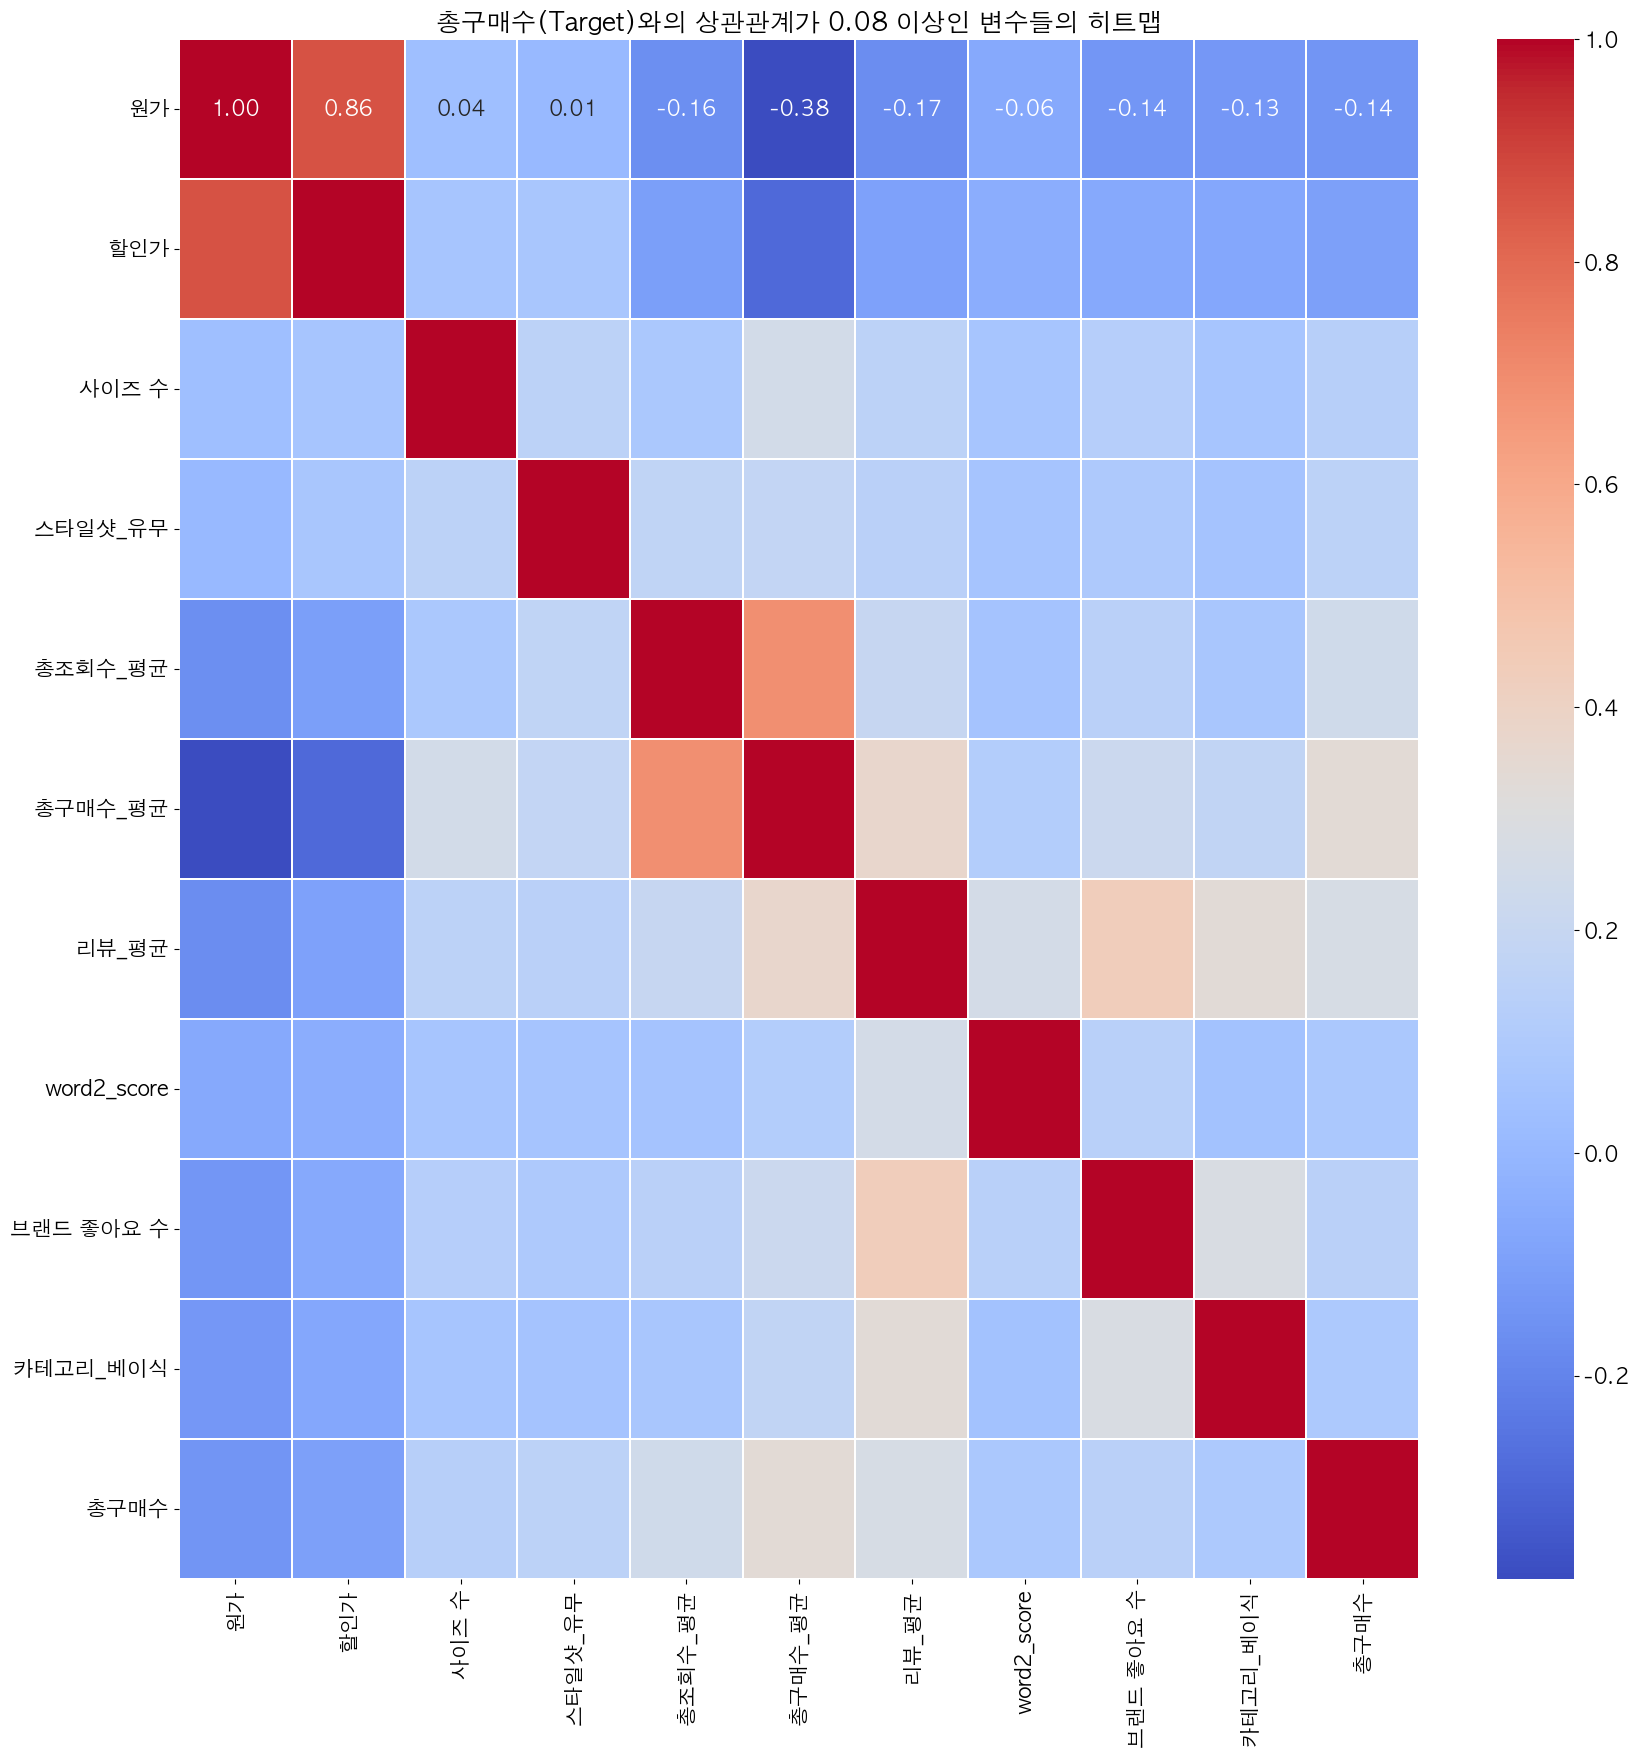

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 상관관계 계산
corr = X.corr()

# 총구매수(Target)와의 상관관계가 0.5 이상인 변수들만 선택
high_corr_with_target = corr['총구매수'][abs(corr['총구매수']) >= 0.08]

# 선택된 변수들에 대한 상관관계 행렬 추출
high_corr_vars = X[high_corr_with_target.index].corr()

# 히트맵 그리기
plt.figure(figsize=(20, 20))
plt.rc('font', size = 15)
sns.heatmap(high_corr_vars, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('총구매수(Target)와의 상관관계가 0.08 이상인 변수들의 히트맵')
plt.show()

In [ ]:
a

,총구매수
0,26174.0
1,16346.0
2,16459.0
3,10687.0
4,10954.0
...,...
3785,51.0
3786,19.0
3787,23.0
3788,21.0


In [ ]:
path = "ml_data_final_recent.csv"
b = pd.read_csv(path,encoding='utf-8',index_col=0)
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 0 to 3789
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   브랜드            3790 non-null   object 
 1   제품명            3790 non-null   object 
 2   제품코드           3790 non-null   float64
 3   원가             3790 non-null   float64
 4   할인가            3790 non-null   float64
 5   할인율            3790 non-null   float64
 6   사이즈 수          3790 non-null   float64
 7   human_ditect   3790 non-null   float64
 8   컬러_encoded     3790 non-null   float64
 9   스타일샷_유무        3790 non-null   float64
 10  총구매수           3790 non-null   float64
 11  총조회수_평균        3790 non-null   float64
 12  총구매수_평균        3790 non-null   float64
 13  판매량등급          3790 non-null   float64
 14  브랜드_구매_성별      3790 non-null   int64  
 15  브랜드_조회_성별      3790 non-null   int64  
 16  rgb_1          3790 non-null   int64  
 17  rgb_2          3790 non-null   int64  
 18  리뷰_평균        

In [ ]:
from sklearn.model_selection import train_test_split
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import joblib

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
target = data.loc[:,'sales_grade']
x2 = data.drop(['brand', 'sales_grade', '카테고리_골프', '카테고리_기타', '카테고리_럭셔리', '카테고리_베이식', '카테고리_스트릿',
               '카테고리_스포츠_아웃도어', '카테고리_여성_캐주얼', '카테고리_영_캐주얼', '카테고리_컨템포러리','카테고리_트래디셔널', '카테고리_포멀',
                'color'], axis = 1)

In [ ]:
target

0       12
1       12
2       12
3       12
4       12
        ..
3785     6
3786     0
3787     3
3788     2
3789     3
Name: sales_grade, Length: 3790, dtype: int64

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x2,
    y,
    test_size = 0.2,
    random_state= 1000,
    stratify = y
)
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

# 아무 세팅을 안 하는 기본 모델을 가지고 baseline을 체크..
kfold = KFold(n_splits = 5, random_state=1000, shuffle=True)

판매량등급
6.0    0.437335
7.0    0.388852
5.0    0.090369
4.0    0.048813
3.0    0.019129
2.0    0.009894
1.0    0.003628
0.0    0.001979
Name: proportion, dtype: float64
판매량등급
6.0    0.436675
7.0    0.389182
5.0    0.091029
4.0    0.048813
3.0    0.018470
2.0    0.010554
1.0    0.003958
0.0    0.001319
Name: proportion, dtype: float64


In [ ]:
from xgboost import XGBClassifier

def xgb_objective(trail) :
    paramas = {
        "n_estimators" : trail.suggest_int("n_estimators", 10,1000),
        "learning_rate": trail.suggest_float("learning_rate",0.01,0.3),
        "max_features":trail.suggest_int("max_features", 1, x_train.shape[1]),
        "max_depth":trail.suggest_int("max_depth", 2,100),
        "min_child_weight":trail.suggest_int("min_child_weight", 2,40),
        "gamma":trail.suggest_float('gamma',0.0,0.7),
        "subsample":trail.suggest_float("subsample",0.01,0.95),
        "colsample_bytree":trail.suggest_float("colsample_bytree",0.01,0.95)}

    xgbc = XGBClassifier(n_jobs = -1, random_state = 1000)
    scores = cross_val_score(xgbc,
                        x_train, y_train,
                        cv = kfold, scoring = 'accuracy')
    acc_mean = scores.mean()

    return acc_mean

In [ ]:
xgb_study = optuna.create_study(direction = 'maximize')
xgb_study.optimize(xgb_objective, n_trials = 20, n_jobs = -1)

[I 2024-05-20 10:25:25,777] A new study created in memory with name: no-name-9f8e8be9-422d-4401-9e33-ad58a4efa749
[I 2024-05-20 10:25:45,555] Trial 5 finished with value: 0.6190609011477755 and parameters: {'n_estimators': 361, 'learning_rate': 0.29302124158408477, 'max_features': 8, 'max_depth': 72, 'min_child_weight': 17, 'gamma': 0.6964463968963526, 'subsample': 0.8723954315515611, 'colsample_bytree': 0.8511160436381883}. Best is trial 1 with value: 0.6190609011477755.
[I 2024-05-20 10:25:45,641] Trial 4 finished with value: 0.6190609011477755 and parameters: {'n_estimators': 845, 'learning_rate': 0.08630302948555227, 'max_features': 29, 'max_depth': 7, 'min_child_weight': 22, 'gamma': 0.6076904891716487, 'subsample': 0.34064097816562317, 'colsample_bytree': 0.575278805773278}. Best is trial 1 with value: 0.6190609011477755.
[I 2024-05-20 10:25:55,646] Trial 0 finished with value: 0.6190609011477755 and parameters: {'n_estimators': 651, 'learning_rate': 0.2540026588764695, 'max_feat

In [ ]:
xgb_study.best_trial.values

[0.6190609011477755]

In [ ]:
xgb_study.best_params

{'n_estimators': 651,
 'learning_rate': 0.2540026588764695,
 'max_features': 10,
 'max_depth': 100,
 'min_child_weight': 24,
 'gamma': 0.6608062776421612,
 'subsample': 0.6324560444515828,
 'colsample_bytree': 0.7315874545957763}

In [ ]:
opt_xgb = XGBClassifier(n_jobs = -1, random_state = 1234, **xgb_study.best_params)

opt_xgb.fit(x_train, y_train)
accuracy_score(y_val, opt_xgb.predict(x_val))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:28:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


0.6015831134564644

In [ ]:
opt_xgb.feature_importances_

array([0.02261128, 0.02186343, 0.02406435, 0.02320736, 0.02192352,
       0.02195947, 0.04977724, 0.02423449, 0.04861239, 0.02209411,
       0.02381455, 0.02185912, 0.02302883, 0.04502815, 0.02371298,
       0.02373289, 0.02341101, 0.02442772, 0.02374924, 0.        ,
       0.        , 0.        , 0.02316587, 0.01990358, 0.        ,
       0.        , 0.02278451, 0.05075321, 0.02551848, 0.02182838,
       0.02183927, 0.02986496, 0.0211021 , 0.02372663, 0.02311416,
       0.02396349, 0.02221225, 0.04326226, 0.02688101, 0.08696772],
      dtype=float32)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, 

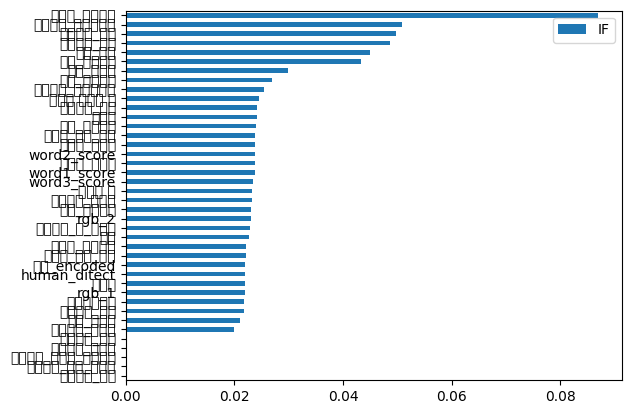

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# plt.barh(x_train.columns, opt_xgb.feature_importances_)

tmp = pd.DataFrame({'IF' : opt_xgb.feature_importances_},
                  index = list(x_train.columns))
tmp.sort_values(by = 'IF').plot(kind = 'barh')

In [ ]:
import joblib
xgb_best = xgb_study.best_params
joblib.dump(xgb_best, "xgb_best14.pkl" )

NameError: name 'xgb_best' is not defined